In [6]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

In [25]:
def plot_data(groups, axes, index, title):
    for key, dfs in groups.items():
        upper_bound = min([max(data["Samples"]) for data in dfs])
        lower_bound = max([min(data["Samples"]) for data in dfs])
        functions = []
        xs = set()
        for i, data in enumerate(dfs):
            samples = np.array(data["Samples"], dtype=pd.Series)
            returns = np.array(data["Test_Return"], dtype=pd.Series)
            xs = xs | (set(samples[samples <= upper_bound]) & set(samples[samples >= lower_bound]))
            functions.append(interp1d(samples, returns))

        xs = np.array(sorted(list(xs)))
        ys = np.zeros((len(functions), xs.shape[0]))

        for i, f in enumerate(functions):
            ys[i]= f(xs)
        
        axes[index].plot(xs, np.mean(ys, axis=0), label=key)
        axes[index].fill_between(xs, np.min(ys, axis=0), np.max(ys, axis=0), alpha=0.1)
        axes[index].set_xlabel("Time Step")
        axes[index].set_ylabel("Average Return")
        axes[index].set_title(title)
    
    if index == 0:
        axes[index].legend()

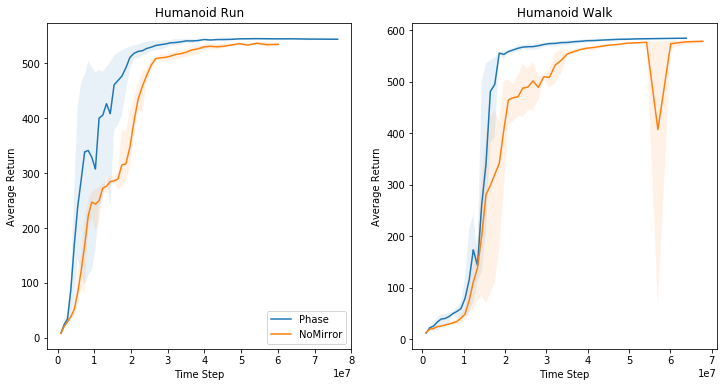

In [29]:
def get_log_paths(pattern):
    return glob.glob(pattern)


runs = [
    {
        "title": "Humanoid Run",
        "pattern": "/home/hyuling/Downloads/humanoid3d_run*.txt"
    },
    {
        "title": "Humanoid Walk",
        "pattern": "/home/hyuling/Downloads/humanoid3d_walk*.txt"
    }
]

f, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, run in enumerate(runs):
    groups = {"Phase": [], "NoMirror": []}
    
    pattern = run["pattern"]
    title = run["title"]
    
    for path in get_log_paths(pattern):
        df = pd.read_csv(path, sep="\s+", header=0)
        group = groups["NoMirror"] if "_asym_" in path else groups["Phase"]
        group.append(df)
    
    plot_data(groups, axes, i, title)
    
plt.savefig("DeepMimic_curves.pdf")